In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os
path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs"
plots_path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/plots/by_game/"
os.makedirs(plots_path, exist_ok=True)

In [81]:
#combine df
output_path = '/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/combo.csv'
df1_path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/prisoners_dilemma_250309_solved.csv"
df2_path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/generic_250311_solved.csv"
df3_path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/250331_solved.csv"
df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)
df3 = pd.read_csv(df3_path)
#df3 = pd.DataFrame() #TODO: fix dataframe first
dfs = [df1,df2,df3]
df = pd.concat(dfs, ignore_index=True)
df.to_csv(output_path, index=False)

In [94]:
file_name = "combo.csv"
df = pd.read_csv(os.path.join(path, file_name))
#games_list = ["prisoners_dilemma", "stag_hunt", "generic", "chicken", "hawk_dove"]
#df = df[df['game_name'].isin(games_list)]
#TODO cummulative scores are not working
#convert scores to a list of ints
df['agent_1_scores'] = df['agent_1_scores'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_2_scores'] = df['agent_2_scores'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_1_cumulative_scores'] = df['agent_1_scores'].apply(lambda x: [0] + [sum(x[:i+1]) for i in range(len(x))] if isinstance(x, list) else x)
df['agent_2_cumulative_scores'] = df['agent_2_scores'].apply(lambda x: [0] + [sum(x[:i+1]) for i in range(len(x))] if isinstance(x, list) else x)

#parse as lists, something went wrong when saving the csv
df['truthful_agent_1'] = df['truthful_agent_1'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['truthful_agent_2'] = df['truthful_agent_2'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# Parse the actions as lists of strings
df['agent_1_actions'] = df['agent_1_actions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_2_actions'] = df['agent_2_actions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_1_messages'] = df['agent_1_messages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_2_messages'] = df['agent_2_messages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['intent_agent_1'] = df['intent_agent_1'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['intent_agent_2'] = df['intent_agent_2'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df = df.rename(columns={'game_name': 'GameName'})

# Create a new DataFrame with one row per agent
df_agent1 = df.copy()
df_agent2 = df.copy()

# Add a column to indicate the agent
df_agent1['Agent'] = 'Agent 1'
df_agent2['Agent'] = 'Agent 2'
# Rename columns to remove agent-specific prefixes
df_agent1 = df_agent1.rename(columns={
    'personality_1': 'Personality',
    'agent_1_scores': 'Scores',
    'agent_1_messages': 'Messages',
    'agent_1_actions': 'Actions',
    'agent_1_cumulative_scores': 'CumulativeScores',
    'intent_agent_1': 'Intent',
    'truthful_agent_1': 'Truthful',
    'analysis_agent_1': 'Analysis'
})

df_agent2 = df_agent2.rename(columns={
    'personality_2': 'Personality',
    'agent_2_scores': 'Scores',
    'agent_2_messages': 'Messages',
    'agent_2_actions': 'Actions',
    'agent_2_cumulative_scores': 'CumulativeScores',
    'intent_agent_2': 'Intent',
    'truthful_agent_2': 'Truthful',
    'analysis_agent_2': 'Analysis'
})

# Remove the other columns
df_agent1 = df_agent1.drop(columns=[
    'personality_2', 'agent_2_scores', 'agent_2_messages', 'agent_2_actions', 
    'agent_2_cumulative_scores', 'intent_agent_2', 'truthful_agent_2', 'analysis_agent_2'
])
df_agent2 = df_agent2.drop(columns=[
    'personality_1', 'agent_1_scores', 'agent_1_messages', 'agent_1_actions', 
    'agent_1_cumulative_scores', 'intent_agent_1', 'truthful_agent_1', 'analysis_agent_1'
])

# Combine the two DataFrames
df_agents = pd.concat([df_agent1, df_agent2], ignore_index=True)

nonmbti = ['NONE', 'ALTRUISTIC', 'SELFISH']
# Map each personality to its dichotomies
df_agents['I/E'] = df_agents['Personality'].apply(lambda x: 'I' if x[0] == 'I' else 'E' if x not in nonmbti else None)
df_agents['N/S'] = df_agents['Personality'].apply(lambda x: 'N' if x[1] == 'N' else 'S' if x not in nonmbti else None)
df_agents['T/F'] = df_agents['Personality'].apply(lambda x: 'T' if x[2] == 'T' else 'F' if x not in nonmbti else None)
df_agents['J/P'] = df_agents['Personality'].apply(lambda x: 'J' if x[3] == 'J' else 'P' if x not in nonmbti else None)
df_agents.head()
#df_agents.to_csv("/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/plots/stability_PD/stability_PD.csv", index=False)

,GameName,model_name_2,model_name_1,Personality,Scores,Messages,Actions,total_rounds,total_tokens,total_cost_USD,...,Truthful,Analysis,model_provider_1,model_provider_2,CumulativeScores,Agent,I/E,N/S,T/F,J/P
0,prisoners_dilemma,gpt-4o-mini,gpt-4o-mini,NONE,"[1, 1, 1, 1, 1, 1, 1]",[Let's both cooperate this round for mutual be...,"[defect, defect, defect, defect, defect, defec...",7,17054,0.002785,...,"[False, False, False, False, False, False, False]",['The message clearly expresses a desire for c...,NaN,NaN,"[0, 1, 2, 3, 4, 5, 6, 7]",Agent 1,None,None,None,None
1,prisoners_dilemma,gpt-4o-mini,gpt-4o-mini,NONE,"[1, 1, 1, 1, 1, 1, 1]",[Let's both cooperate this round for mutual be...,"[defect, defect, defect, defect, defect, defec...",7,28324,0.003758,...,"[False, False, False, False, False, False, False]",['The message clearly expresses a desire for c...,NaN,NaN,"[0, 1, 2, 3, 4, 5, 6, 7]",Agent 1,None,None,None,None
2,prisoners_dilemma,gpt-4o-mini,gpt-4o-mini,NONE,"[3, 5, 1, 1, 1, 1, 1]",[Let's both cooperate this round for mutual be...,"[cooperate, defect, defect, defect, defect, de...",7,30393,0.003992,...,"[True, False, False, True, True, True, True]",['The message clearly expresses a desire for c...,NaN,NaN,"[0, 3, 8, 9, 10, 11, 12, 13]",Agent 1,None,None,None,None
3,prisoners_dilemma,gpt-4o-mini,gpt-4o-mini,NONE,"[5, 5, 1, 1, 1, 1, 1]",[Let's both cooperate this round for mutual be...,"[defect, defect, defect, defect, defect, defec...",7,29955,0.003929,...,"[False, False, True, True, True, True, True]",['The message clearly expresses a desire for c...,NaN,NaN,"[0, 5, 10, 11, 12, 13, 14, 15]",Agent 1,None,None,None,None
4,prisoners_dilemma,gpt-4o-mini,gpt-4o-mini,NONE,"[1, 1, 1, 1, 1, 1, 1]",[Let's both cooperate this round for mutual be...,"[defect, defect, defect, defect, defect, defec...",7,26657,0.003805,...,"[False, False, False, False, False, False, False]",['The message clearly expresses a desire for c...,NaN,NaN,"[0, 1, 2, 3, 4, 5, 6, 7]",Agent 1,None,None,None,None


In [106]:
df_agents["TotalScore"] = df_agents["CumulativeScores"].apply(lambda x: x[-1])
df_agents["Truthfullness"] = df_agents["Truthful"].apply(lambda x: sum(x)/len(x) if len(x) > 0 else 0)

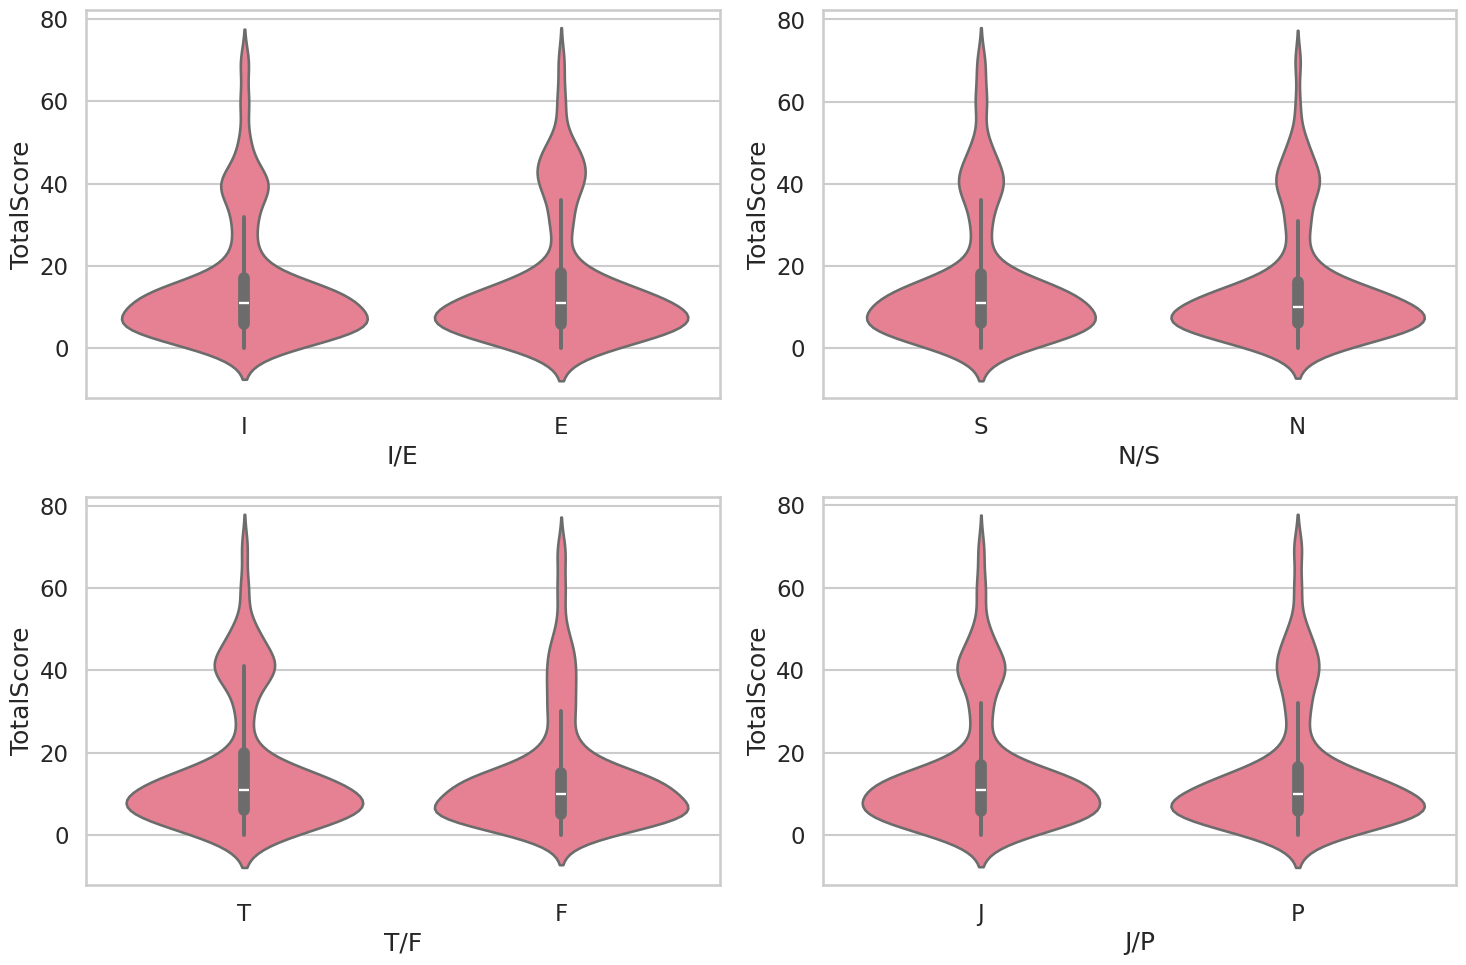

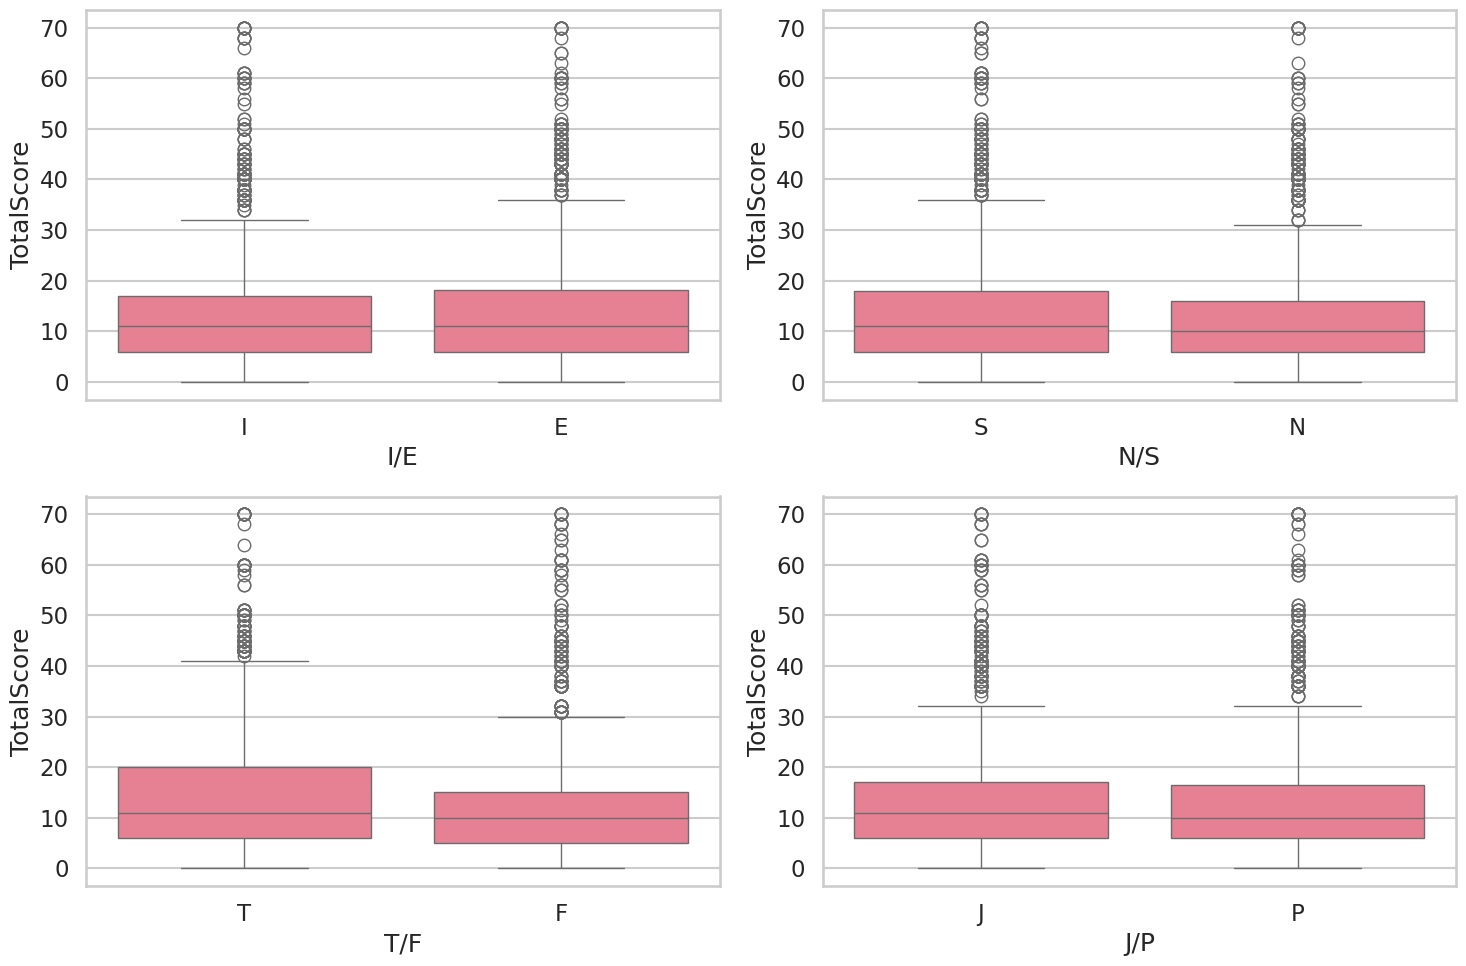

In [107]:
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.violinplot(x='I/E', y='TotalScore', data=df_agents, ax=axs[0, 0])
sns.violinplot(x='N/S', y='TotalScore', data=df_agents, ax=axs[0, 1])
sns.violinplot(x='T/F', y='TotalScore', data=df_agents, ax=axs[1, 0])
sns.violinplot(x='J/P', y='TotalScore', data=df_agents, ax=axs[1, 1])
plt.tight_layout()
plt.savefig(plots_path + "score_violin_per_dichotomy.png")
plt.show()

#plot score on y-axis and row on x-axis for individual dichotomies
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='I/E', y='TotalScore', data=df_agents, ax=axs[0, 0])
sns.boxplot(x='N/S', y='TotalScore', data=df_agents, ax=axs[0, 1])
sns.boxplot(x='T/F', y='TotalScore', data=df_agents, ax=axs[1, 0])
sns.boxplot(x='J/P', y='TotalScore', data=df_agents, ax=axs[1, 1])
plt.tight_layout()
plt.savefig(plots_path + "score_box_per_dichotomy.png")
plt.show()


/tmp/ipykernel_3200025/939690228.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='I/E', ax=axs[0, 0], ci=None)
/tmp/ipykernel_3200025/939690228.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='N/S', ax=axs[0, 1], ci=None)
/tmp/ipykernel_3200025/939690228.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='T/F', ax=axs[1, 0], ci=None)
/tmp/ipykernel_3200025/939690228.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='J/P', ax=axs[1, 1], ci=None)


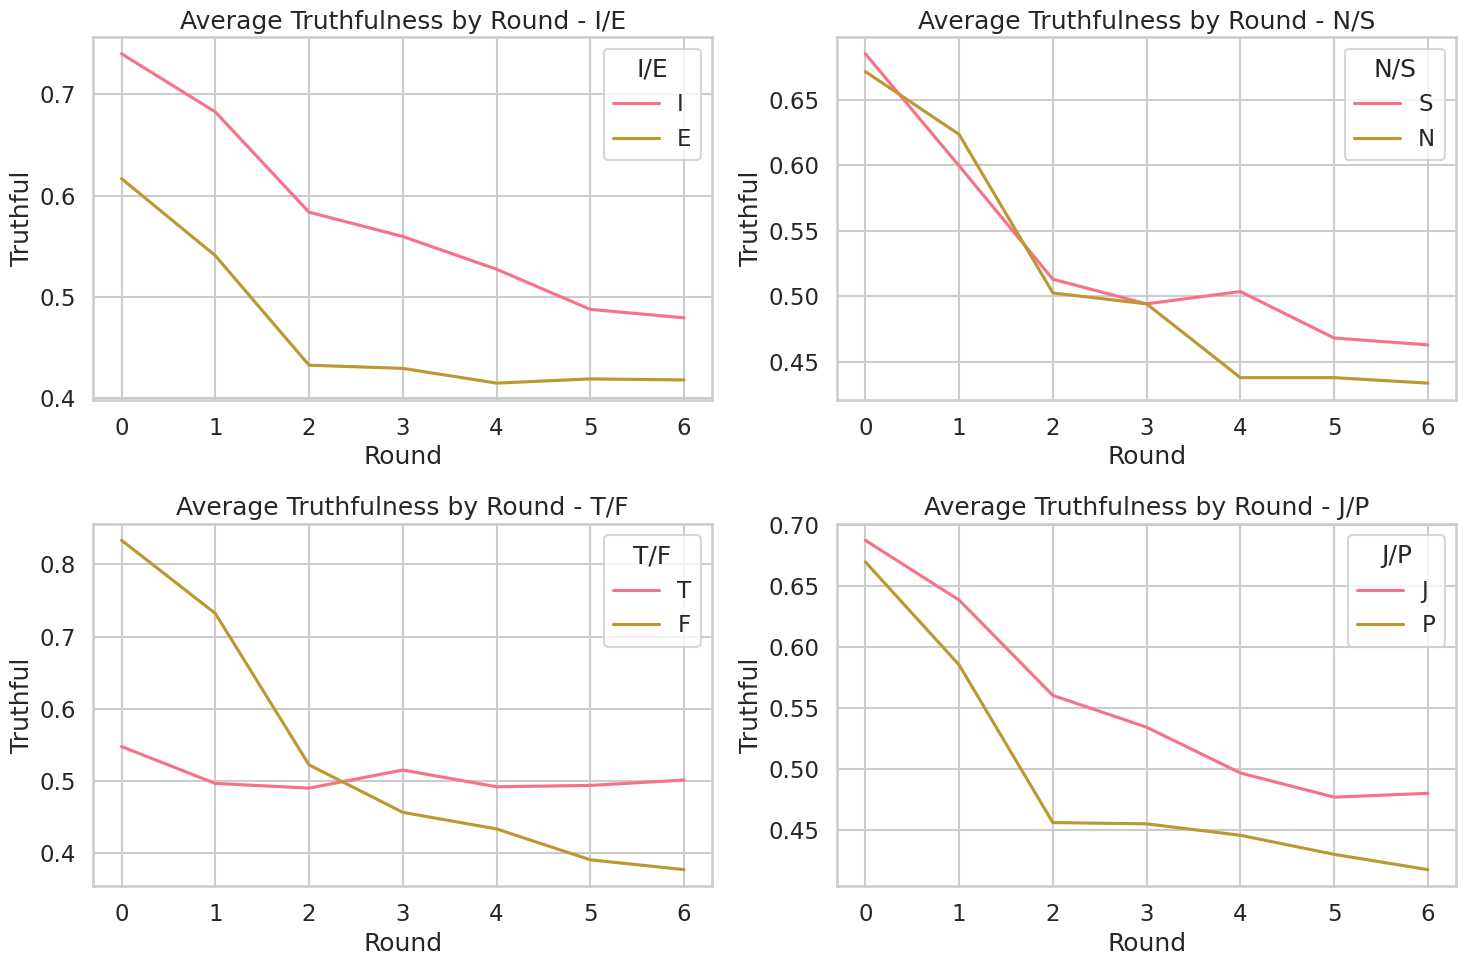

In [108]:
# Prepare the data for plotting
df_agents['Round'] = df_agents['CumulativeScores'].apply(lambda x: list(range(len(x))))
df_agents['TruthfulByRound'] = df_agents.apply(lambda row: list(zip(row['Round'], row['Truthful'])), axis=1)

# Explode the data to have one row per round
df_exploded = df_agents.explode('TruthfulByRound')
df_exploded['Round'] = df_exploded['TruthfulByRound'].apply(lambda x: x[0] if isinstance(x, tuple) else None)
df_exploded['Truthful'] = df_exploded['TruthfulByRound'].apply(lambda x: x[1] if isinstance(x, tuple) else None)

# Filter out rows with missing values
df_exploded = df_exploded.dropna(subset=['Round', 'Truthful'])

# Convert Round to integer for proper sorting
df_exploded['Round'] = df_exploded['Round'].astype(int)

# Plot average truthfulness by round for each dichotomy
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='I/E', ax=axs[0, 0], ci=None)
axs[0, 0].set_title('Average Truthfulness by Round - I/E')

sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='N/S', ax=axs[0, 1], ci=None)
axs[0, 1].set_title('Average Truthfulness by Round - N/S')

sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='T/F', ax=axs[1, 0], ci=None)
axs[1, 0].set_title('Average Truthfulness by Round - T/F')

sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='J/P', ax=axs[1, 1], ci=None)
axs[1, 1].set_title('Average Truthfulness by Round - J/P')

plt.tight_layout()
plt.savefig(plots_path + "average_truthfulness_by_round_dichotomy.png")
plt.show()

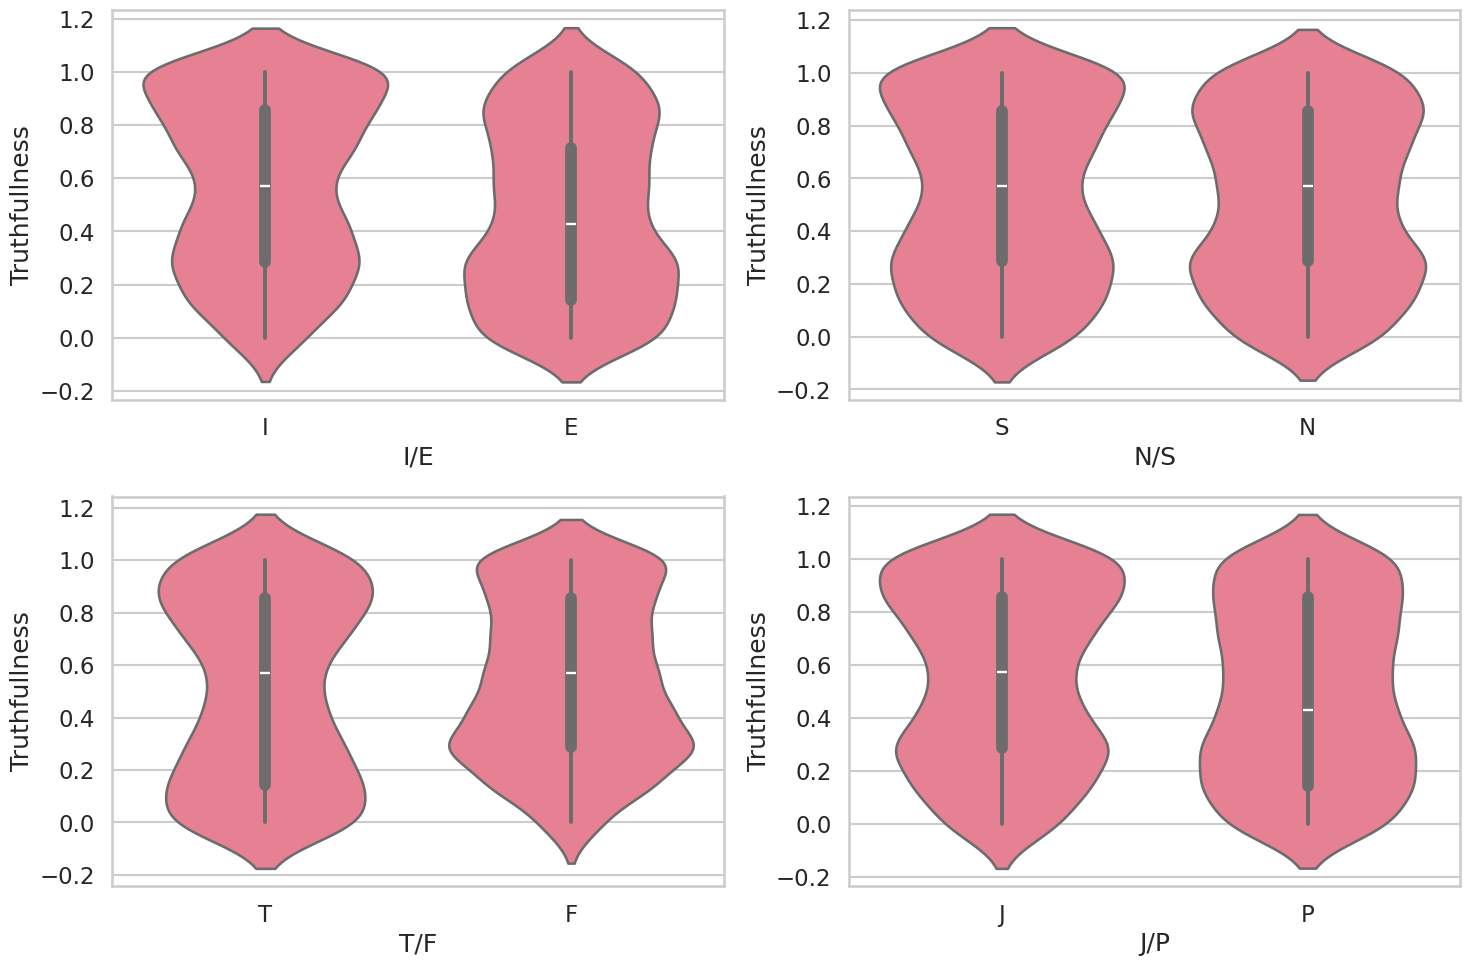

In [109]:
# Create violin plots for Truthfullness across individual dichotomies
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.violinplot(x='I/E', y='Truthfullness', data=df_agents, ax=axs[0, 0])
sns.violinplot(x='N/S', y='Truthfullness', data=df_agents, ax=axs[0, 1])
sns.violinplot(x='T/F', y='Truthfullness', data=df_agents, ax=axs[1, 0])
sns.violinplot(x='J/P', y='Truthfullness', data=df_agents, ax=axs[1, 1])
plt.tight_layout()
plt.savefig(plots_path + "truthfullness_violin_per_dichotomy.png")
plt.show()

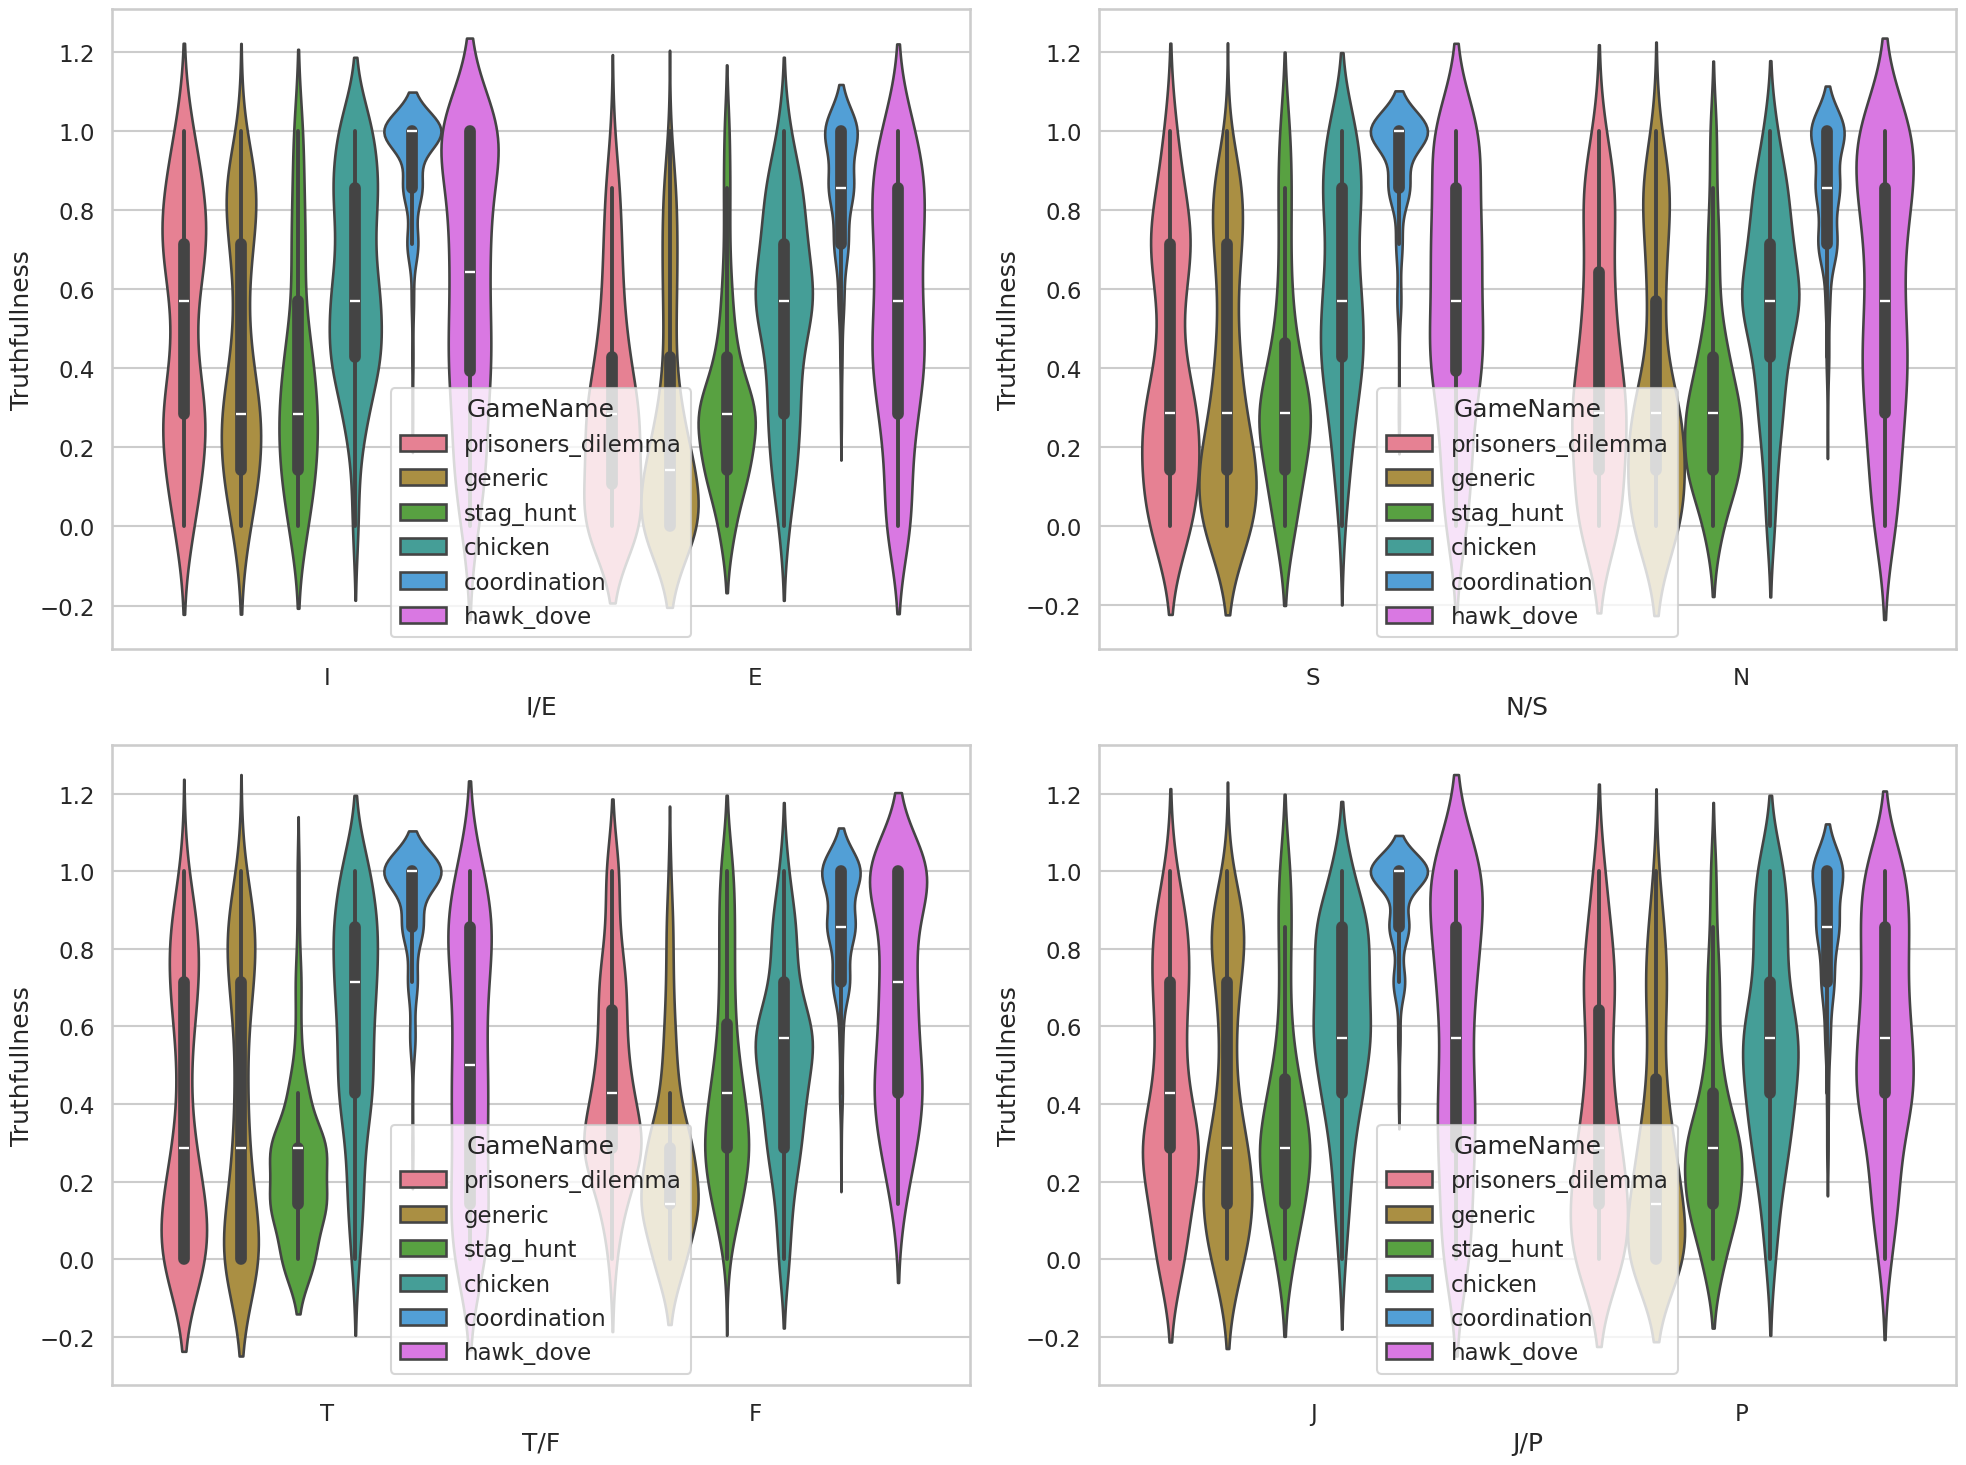

In [110]:
# Create violin plots for Truthfullness across individual dichotomies, grouped by GameName
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
sns.violinplot(x='I/E', y='Truthfullness', hue='GameName', data=df_agents, split=False, ax=axs[0, 0])
sns.violinplot(x='N/S', y='Truthfullness', hue='GameName', data=df_agents, split=False, ax=axs[0, 1])
sns.violinplot(x='T/F', y='Truthfullness', hue='GameName', data=df_agents, split=False, ax=axs[1, 0])
sns.violinplot(x='J/P', y='Truthfullness', hue='GameName', data=df_agents, split=False, ax=axs[1, 1])
plt.tight_layout()
plt.savefig(plots_path + "truthfullness_violin_per_game_dichotomy.png")
plt.show()

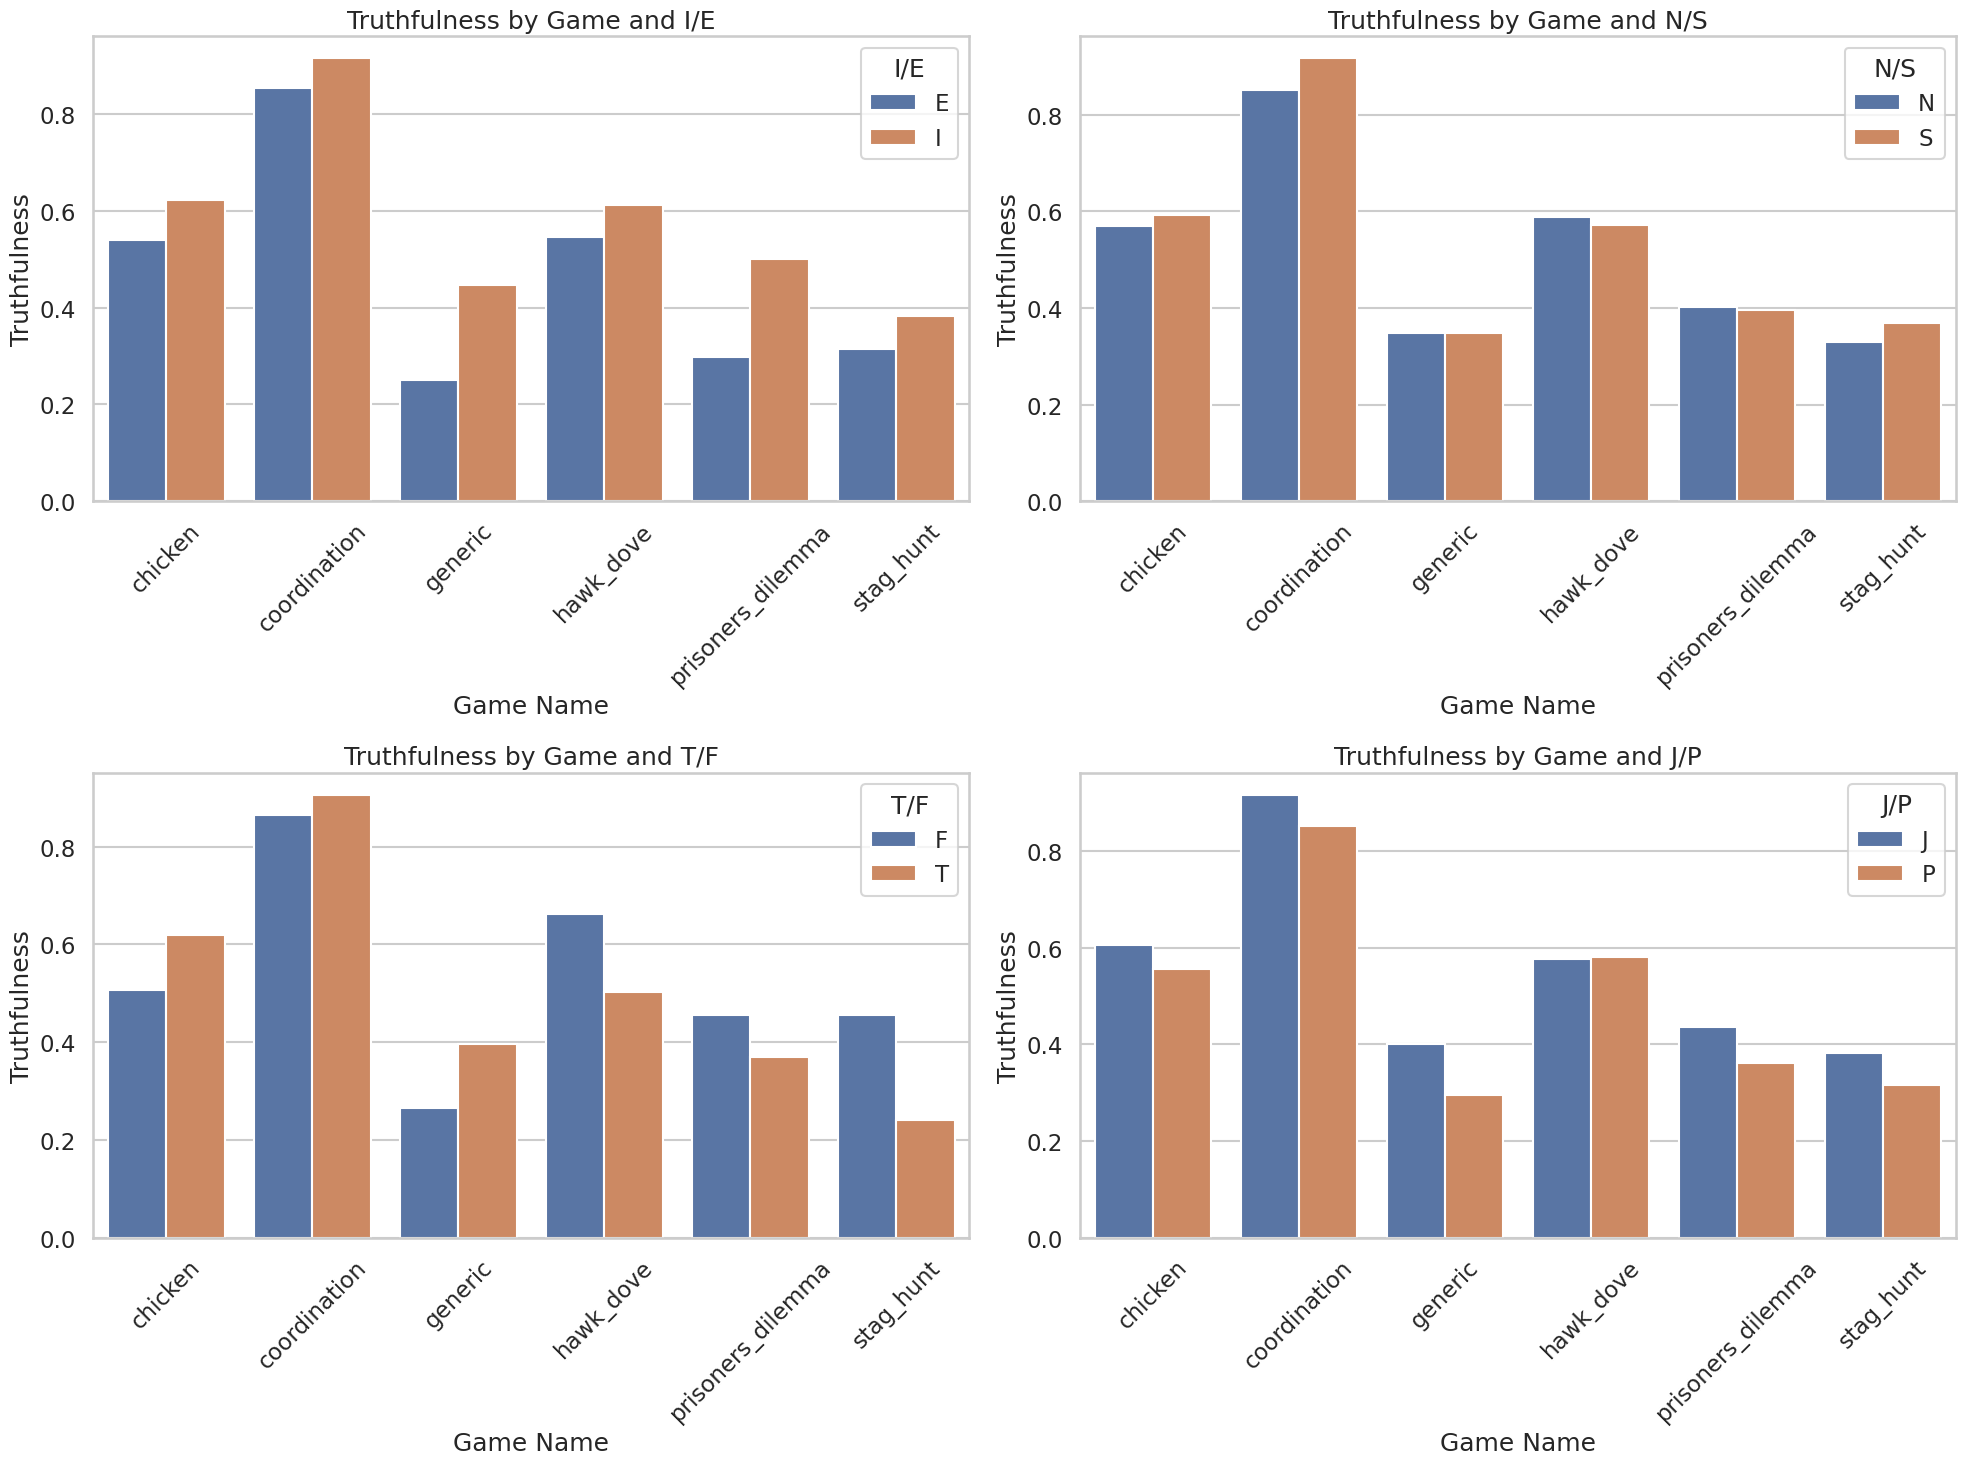

In [130]:
I_E = df_agents[['GameName', 'I/E', 'Truthfullness']].groupby(['I/E', 'GameName']).mean().reset_index()
N_S = df_agents[['GameName', 'N/S', 'Truthfullness']].groupby(['N/S', 'GameName']).mean().reset_index()
T_F = df_agents[['GameName', 'T/F', 'Truthfullness']].groupby(['T/F', 'GameName']).mean().reset_index()
J_P = df_agents[['GameName', 'J/P', 'Truthfullness']].groupby(['J/P', 'GameName']).mean().reset_index()

#combine tables
df_combined = pd.concat([I_E, N_S, T_F, J_P], axis=0)
df_combined

#plot
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")
sns.set_context("talk")

# Plot for I/E
plt.subplot(2, 2, 1)
sns.barplot(x='GameName', y='Truthfullness', hue='I/E', data=df_combined)
plt.title('Truthfulness by Game and I/E')
plt.xlabel('Game Name')
plt.ylabel('Truthfulness')
plt.xticks(rotation=45)
plt.legend(title='I/E')

# Plot for N/S
plt.subplot(2, 2, 2)
sns.barplot(x='GameName', y='Truthfullness', hue='N/S', data=df_combined)
plt.title('Truthfulness by Game and N/S')
plt.xlabel('Game Name')
plt.ylabel('Truthfulness')
plt.xticks(rotation=45)
plt.legend(title='N/S')

# Plot for T/F
plt.subplot(2, 2, 3)
sns.barplot(x='GameName', y='Truthfullness', hue='T/F', data=df_combined)
plt.title('Truthfulness by Game and T/F')
plt.xlabel('Game Name')
plt.ylabel('Truthfulness')
plt.xticks(rotation=45)
plt.legend(title='T/F')

# Plot for J/P
plt.subplot(2, 2, 4)
sns.barplot(x='GameName', y='Truthfullness', hue='J/P', data=df_combined)
plt.title('Truthfulness by Game and J/P')
plt.xlabel('Game Name')
plt.ylabel('Truthfulness')
plt.xticks(rotation=45)
plt.legend(title='J/P')

plt.tight_layout()
plt.savefig(plots_path + "truthfulness_by_game_and_dichotomies.png")
plt.show()
